In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [13]:
cd /content/drive/MyDrive/MAS456_컴퓨터통계방법론

/content/drive/MyDrive/MAS456_컴퓨터통계방법론


# **Homework 1(20200639 Chae Woojin)**

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pd.options.display.float_format = '{:,.2f}'.format # Print only 2 decimal cases.

# **Chapter2**

# **8.**

# **a)**

In [15]:
college = pd.read_csv('College.csv')

# **b)**

In [16]:
college2 = pd.read_csv('College.csv', index_col=0)
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')
college = college3

# **c)**

**i.**

In [17]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,"3,001.64","2,018.80",779.97,27.56,55.80,"3,699.91",855.30,"10,440.67","4,357.53",549.38,"1,340.64",72.66,79.70,14.09,22.74,"9,660.17",65.46
std,"3,870.20","2,451.11",929.18,17.64,19.80,"4,850.42","1,522.43","4,023.02","1,096.70",165.11,677.07,16.33,14.72,3.96,12.39,"5,221.77",17.18
min,81.00,72.00,35.00,1.00,9.00,139.00,1.00,"2,340.00","1,780.00",96.00,250.00,8.00,24.00,2.50,0.00,"3,186.00",10.00
25%,776.00,604.00,242.00,15.00,41.00,992.00,95.00,"7,320.00","3,597.00",470.00,850.00,62.00,71.00,11.50,13.00,"6,751.00",53.00
50%,"1,558.00","1,110.00",434.00,23.00,54.00,"1,707.00",353.00,"9,990.00","4,200.00",500.00,"1,200.00",75.00,82.00,13.60,21.00,"8,377.00",65.00
75%,"3,624.00","2,424.00",902.00,35.00,69.00,"4,005.00",967.00,"12,925.00","5,050.00",600.00,"1,700.00",85.00,92.00,16.50,31.00,"10,830.00",78.00
max,"48,094.00","26,330.00","6,392.00",96.00,100.00,"31,643.00","21,836.00","21,700.00","8,124.00","2,340.00","6,800.00",103.00,100.00,39.80,64.00,"56,233.00",118.00


In [18]:
college.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

<hr>

**ii.**

In [83]:
pd.plotting.scatter_matrix(college.iloc[:, 1:11], alpha=0.5, figsize = (30, 30))

Output hidden; open in https://colab.research.google.com to view.

<hr>

**iii.**

<Axes: title={'center': 'Outstate'}, xlabel='[Private]'>

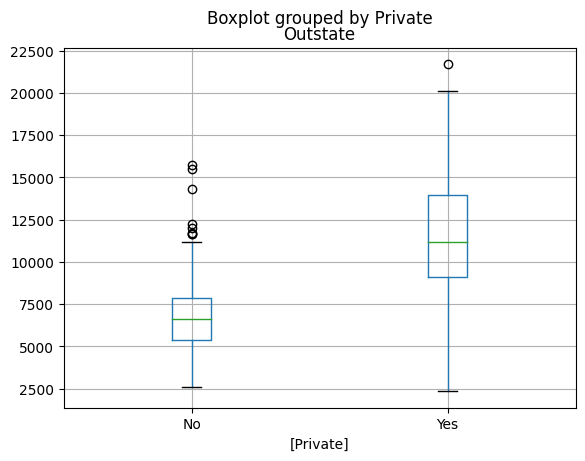

In [21]:
college.boxplot(column=['Outstate'], by=['Private'])

<hr>

**iv.**

In [22]:
college['Elite'] = pd.cut(college['Top10perc'], bins=[0, 50, 100], labels=['No', 'Yes'])

In [23]:
college.value_counts(subset=['Elite'])

Elite
No       699
Yes       78
dtype: int64

Text(0.5, 0, 'Elite')

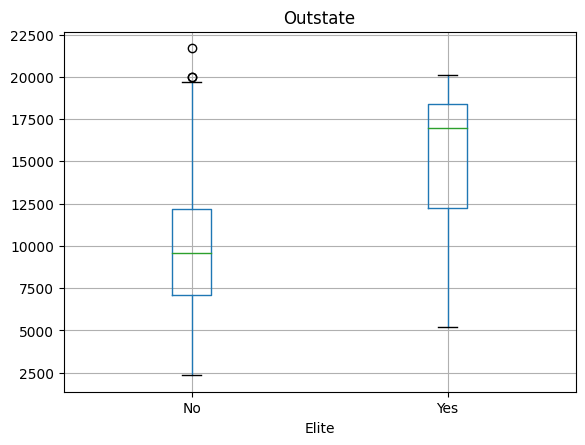

In [24]:
ax = college.boxplot(column=['Outstate'], by=['Elite'])

fig = ax.get_figure()
fig.suptitle('')
ax.set_xticks([1, 2], ['No', 'Yes'])
ax.set_xlabel('Elite')

<hr>

**v.**

In [25]:
private = college[college['Private'] == 'Yes'].copy()
nonprivate = college[college['Private'] == 'No'].copy()

private['Acceptance Possibility (Private)'] = pd.cut(private['Accept'] / private['Apps'], bins=np.arange(0, 1.2, 0.2), labels=['0.0~0.2', '0.2~0.4', '0.4~0.6', '0.6~0.8', '0.8~1.0'])
nonprivate['Acceptance Possibility (Non Private)'] = pd.cut(nonprivate['Accept'] / nonprivate['Apps'], bins=np.arange(0, 1.2, 0.2), labels=['0.0~0.2', '0.2~0.4', '0.4~0.6', '0.6~0.8', '0.8~1.0'])
private['Enroll Possibility (Private)'] =  pd.cut(private['Enroll'] / private['Accept'], bins=np.arange(0, 1.2, 0.2), labels=['0.0~0.2', '0.2~0.4', '0.4~0.6', '0.6~0.8', '0.8~1.0'])
nonprivate['Enroll Possibility (Non Private)'] = pd.cut(nonprivate['Enroll'] / nonprivate['Accept'], bins=np.arange(0, 1.2, 0.2), labels=['0.0~0.2', '0.2~0.4', '0.4~0.6', '0.6~0.8', '0.8~1.0'])

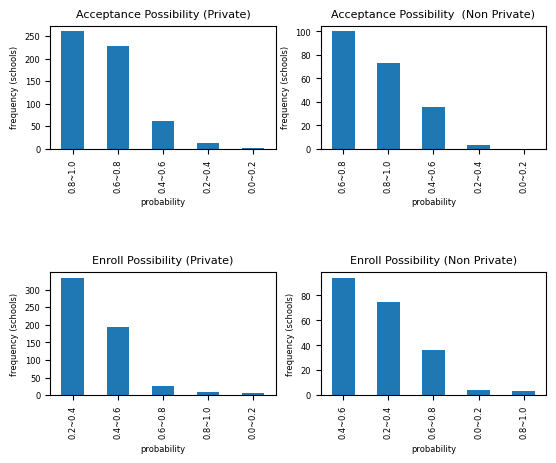

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2)

private['Acceptance Possibility (Private)'].value_counts().plot(ax=axes[0, 0], kind='bar')
nonprivate['Acceptance Possibility (Non Private)'].value_counts().plot(ax=axes[0, 1], kind='bar')
private['Enroll Possibility (Private)'].value_counts().plot(ax=axes[1, 0], kind='bar')
nonprivate['Enroll Possibility (Non Private)'].value_counts().plot(ax=axes[1, 1], kind='bar')

axes[0, 0].set_title('Acceptance Possibility (Private)', fontsize=8)
axes[0, 1].set_title('Acceptance Possibility  (Non Private)', fontsize=8)
axes[1, 0].set_title('Enroll Possibility (Private)', fontsize=8)
axes[1, 1].set_title('Enroll Possibility (Non Private)', fontsize=8)

for i in range(2):
    for j in range(2):
        axes[i, j].xaxis.set_tick_params(labelsize=6)
        axes[i, j].yaxis.set_tick_params(labelsize=6)
        axes[i, j].set_xlabel('probability', fontsize=6)
        axes[i, j].set_ylabel('frequency (schools)', fontsize=6)

plt.subplots_adjust(hspace=1)

<hr>

**vi**

According to v., acceptance possibility (acceptance rate) seems higher for private school than non-private school. However, enroll possibility (enroll rate) was much higher for non-private school than private one.

# **9.**

In [27]:
auto = pd.read_csv('Auto.csv')

In [28]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [29]:
auto['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [30]:
auto = auto[auto['horsepower'] != '?'].copy().reset_index().iloc[:, 1:]
auto['horsepower'] = pd.to_numeric(auto['horsepower'])

# **(a) Qualitative and qualitative predictors**

In [31]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.00,8,307.00,130,3504,12.00,70,1,chevrolet chevelle malibu
1,15.00,8,350.00,165,3693,11.50,70,1,buick skylark 320
2,18.00,8,318.00,150,3436,11.00,70,1,plymouth satellite
3,16.00,8,304.00,150,3433,12.00,70,1,amc rebel sst
4,17.00,8,302.00,140,3449,10.50,70,1,ford torino


**Quantitative Predictors**

In [32]:
quantitative = auto.select_dtypes(include=['number']).columns
quantitative

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

**Qualitative Predictors**

In [33]:
qualitative = auto.select_dtypes(exclude=['number']).columns
qualitative

Index(['name'], dtype='object')

# **(b) Range of each quantitave predictor**

In [34]:
auto[quantitative].apply(max) - auto[quantitative].apply(min)

mpg               37.60
cylinders          5.00
displacement     387.00
horsepower       184.00
weight         3,527.00
acceleration      16.80
year              12.00
origin             2.00
dtype: float64

# **(c) Mean and Standard Deviation**

In [35]:
auto[quantitative].mean()

mpg               23.45
cylinders          5.47
displacement     194.41
horsepower       104.47
weight         2,977.58
acceleration      15.54
year              75.98
origin             1.58
dtype: float64

In [36]:
auto[quantitative].std()

mpg              7.81
cylinders        1.71
displacement   104.64
horsepower      38.49
weight         849.40
acceleration     2.76
year             3.68
origin           0.81
dtype: float64

# **(d) Range, Mean, Standard Deviation of data sample**

In [37]:
auto_sample = auto.drop(axis=0, index=range(10, 86))

In [38]:
auto_sample[quantitative].apply(max) - auto_sample[quantitative].apply(min)

mpg               35.60
cylinders          5.00
displacement     387.00
horsepower       184.00
weight         3,348.00
acceleration      16.30
year              12.00
origin             2.00
dtype: float64

In [39]:
auto_sample[quantitative].mean()

mpg               24.41
cylinders          5.37
displacement     187.51
horsepower       100.85
weight         2,936.53
acceleration      15.72
year              77.14
origin             1.60
dtype: float64

In [40]:
auto_sample[quantitative].std()

mpg              7.86
cylinders        1.65
displacement   100.11
horsepower      35.95
weight         811.87
acceleration     2.71
year             3.12
origin           0.82
dtype: float64

# **(e) Investigate the predictors graphically**

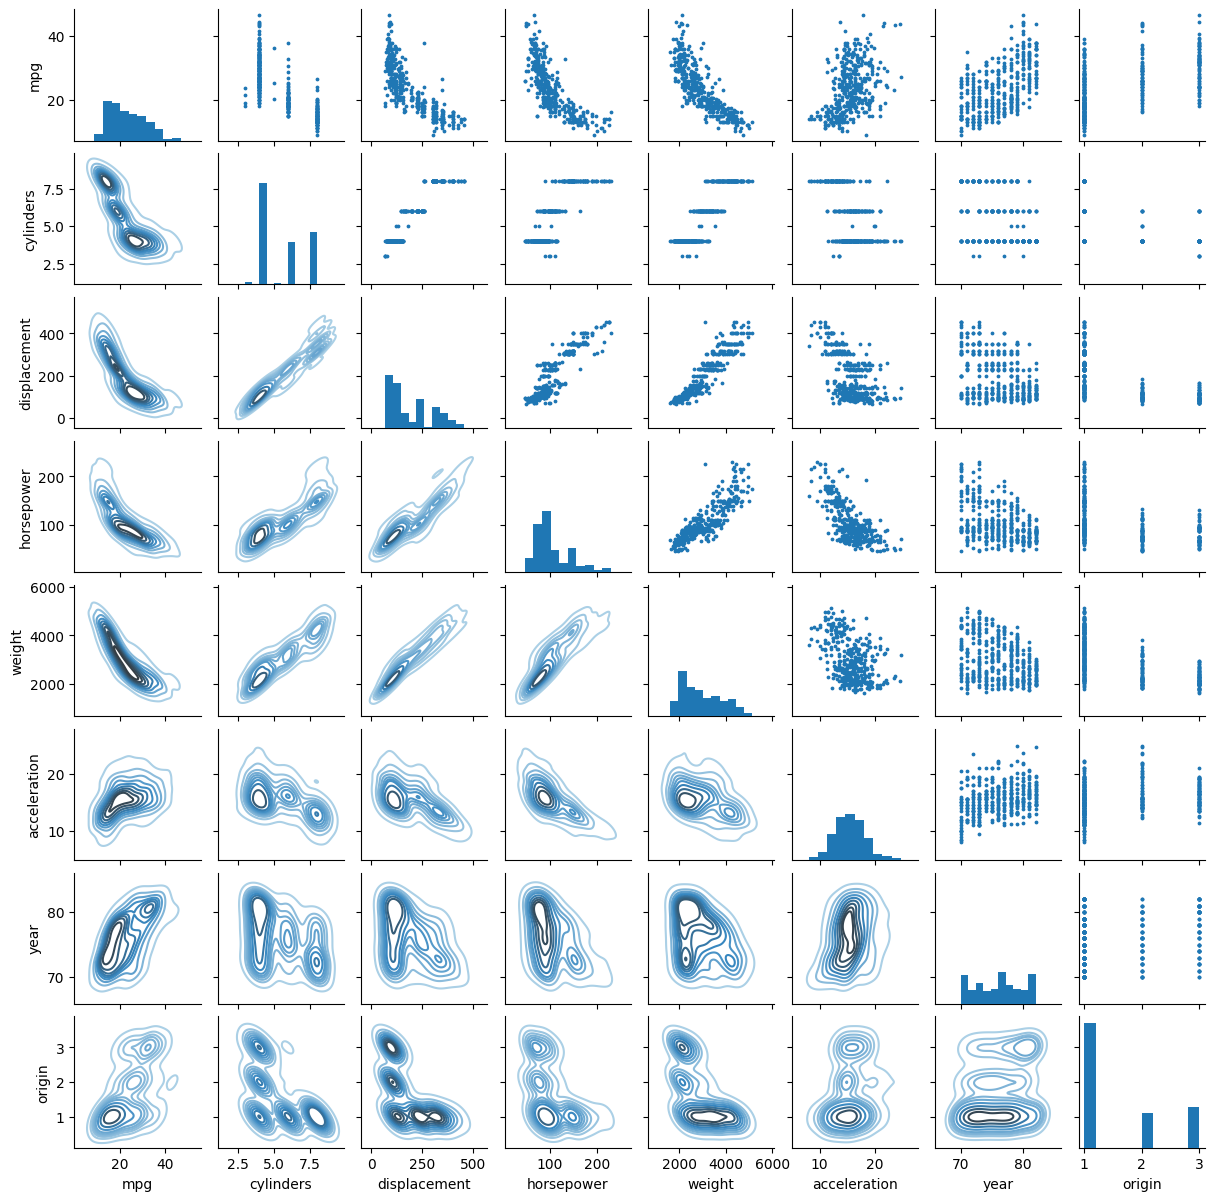

In [41]:
g = sns.PairGrid(auto)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.fig.set_size_inches(12, 12)

According to the scatterplot, displacement and weight seems to have strong linear relationship. Also, mpg seems to have non-linear relationship with weight, horsepower, and displacement.

# **(f) predicting mpg**

Based on the previous answer, weight, horsepower, and displacement can be used to predict mpg.

# **Chapter 3**

# **13.**

# **(a)**

In [42]:
x = np.random.normal(loc=0, scale=1, size=100)

# **(b)**

In [43]:
eps = np.random.normal(loc=0, scale=0.25, size=100)

# **(c)**

In [44]:
y = -1 + 0.5*x + eps
len(y)

100

**$β_0=-1$, $β_1=0.5$**

# **(d)**

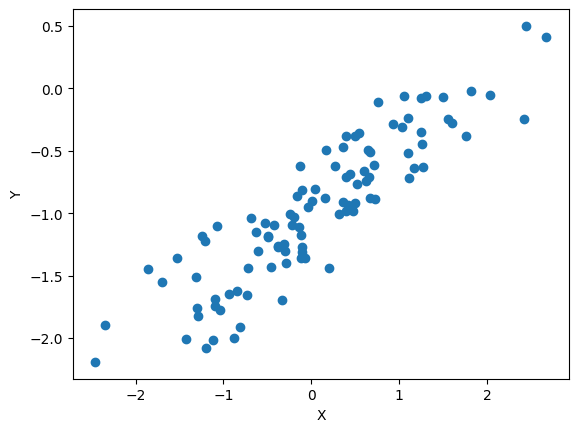

In [45]:
plt.scatter(x=x, y=y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

It seems that X, Y have linear relation

# **(e)**

In [48]:
# Calcualate Using Linear Regression Model

model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

print(round(model.intercept_, 4))
print(round(model.coef_[0], 4))

-0.9993
0.5035


In [49]:
# Calculate Using ols package

df = pd.DataFrame({'x': x, 'y': y})
reg = smf.ols('y ~ x', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     384.2
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           1.11e-35
Time:                        06:13:08   Log-Likelihood:                -7.0113
No. Observations:                 100   AIC:                             18.02
Df Residuals:                      98   BIC:                             23.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9993      0.026    -38.032      0.000      -1.051      -0.947
x              0.5035      0.026     19.601      0.000       0.453       0.555
==============================================================================
Omnibus:                        3.285   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                1.926
Skew:                          -0.016   Prob(JB):                        0.382
Kurtosis:                       2.321   Cond. No.                         1.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Calculate Using Formula

x_bar = x.mean()
y_bar = y.mean()
b1_hat = sum((x-x_bar)*(y-y_bar)) / sum(np.square((x-x_bar)))
b0_hat = y_bar - b1_hat*x_bar
print('b0_hat: {0}'.format(round(b0_hat, 4)))
print('b1_hat: {0}\n'.format(round(b1_hat, 4)))

rss = sum(np.square(y-b0_hat-b1_hat*x))
rse = np.sqrt(rss/98)
print("RSE: {0}\n".format(round(rse, 3)))

se_square_b0 = np.square(rse)*(1/100 + np.square(x_bar) / sum(np.square(x-x_bar)))
se_square_b1 = np.square(rse)/sum(np.square(x-x_bar))

print('The 95% CI of B0 is ({0}, {1})'.format(round(b0_hat-2*np.sqrt(se_square_b0), 3), round(b0_hat+2*np.sqrt(se_square_b0), 3)))
print('The 95% CI of B1 is ({0}, {1})\n'.format(round(b1_hat-2*np.sqrt(se_square_b1), 3), round(b1_hat+2*np.sqrt(se_square_b1), 3)))

print("SE of b0 hat: {0}".format(np.sqrt(se_square_b0)))
print("SE of b1 hat: {0}".format(np.sqrt(se_square_b1)))

b0_hat: -0.9993
b1_hat: 0.5035

RSE: 0.262

The 95% CI of B0 is (-1.052, -0.947)
The 95% CI of B1 is (0.452, 0.555)

SE of b0 hat: 0.0262745737237346
SE of b1 hat: 0.025688860344259764


# **(f)**

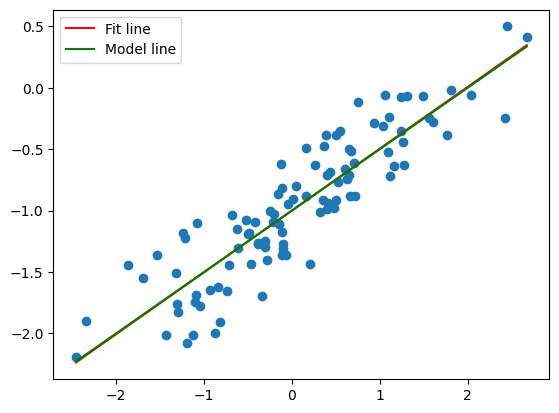

In [51]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

# Scatter plot
plt.scatter(df.x, df.y)

# Fitted line with LSE
xfit = np.linspace(df.x.min(), df.x.max(), 100)
yfit = model.predict(xfit.reshape(-1, 1))
fit, = plt.plot(xfit, yfit, color='r')

# Population line
xpop = np.linspace(df.x.min(), df.x.max(), 100)
ypop = -1 + 0.5 * xpop
pop, = plt.plot(xpop, ypop, color='g')

# create legend
plt.legend([fit, pop],['Fit line','Model line'])

# **(g)**

real x: [-0.81346948]
trained x: [-0.81346948  0.6617326 ]

intercept (b0_hat): -1.0139
1st order coefficient (b1_hat): 0.5
2nd order coefficient (b2_hat): 0.0143


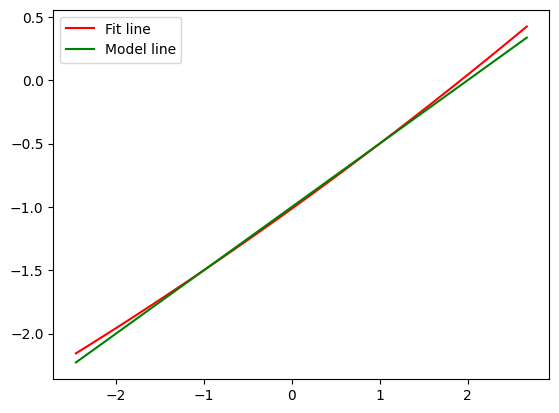

In [52]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_real = x.reshape(-1, 1)
x_train_poly = poly_features.fit_transform(x_real)

# print x
print('real x: {0}'.format(x_real[0]))

# print x, and x^2
print('trained x: {0}\n'.format(x_train_poly[0]))

# polynomial regression
model = LinearRegression()
model.fit(x_train_poly, y)

# print coefficients
print('intercept (b0_hat): {0}'.format(round(model.intercept_, 4)))
print('1st order coefficient (b1_hat): {0}'.format(round(model.coef_[0], 4)))
print('2nd order coefficient (b2_hat): {0}'.format(round(model.coef_[1], 4)))


# plot fitted line
xfit = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
xfit_poly = poly_features.transform(xfit)
yfit = model.predict(xfit_poly)
fit, = plt.plot(xfit, yfit, color='r')

xpop = np.linspace(x.min(), x.max(), 100)
ypop = -1 + 0.5 * xpop
pop, = plt.plot(xpop, ypop, color='g')

# create legend
plt.legend([fit, pop],['Fit line','Model line'])

In [53]:
reg = smf.ols('y ~ x + I(x**2)', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     191.6
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           2.02e-34
Time:                        06:13:09   Log-Likelihood:                -6.6976
No. Observations:                 100   AIC:                             19.40
Df Residuals:                      97   BIC:                             27.21
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0139      0.032    -31.351      0.000      -1.078      -0.950
x              0.5000      0.026     19.138      0.000       0.448       0.552
I(x ** 2)      0.0143      0.018      0.781      0.437      -0.022       0.050
==============================================================================
Omnibus:                        2.755   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                1.749
Skew:                          -0.038   Prob(JB):                        0.417
Kurtosis:                       2.357   Cond. No.                         2.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$H_0$: coefficient of 2nd order term = 0
vs
$H_1$: coefficient of 2nd order term $\ne$ 0


As $p$ value of $X^2$ term is 0.437, there is no evidence to reject $H_0$. Therefore, it is reasonable to conclude that $X^2$ and $Y$ are statistically unrelated. In other words, it means that the quadratic term did not improved the model fit.

# **(h)**

In [54]:
x = np.random.normal(loc = 0, size = 100)
eps = np.random.normal(loc = 0, scale = 0.05, size = 100)
y = -1 + 0.5*x + eps
len(y)

100

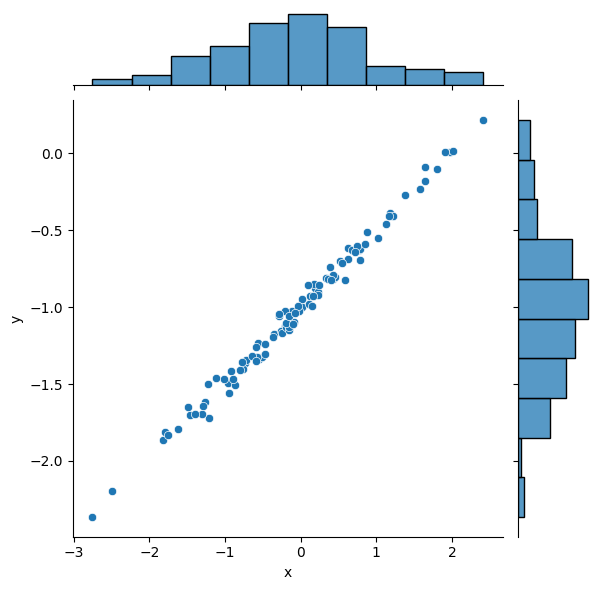

In [55]:
df = pd.DataFrame({'x': x, 'y': y})
sns.jointplot(x='x', y='y', data=df)

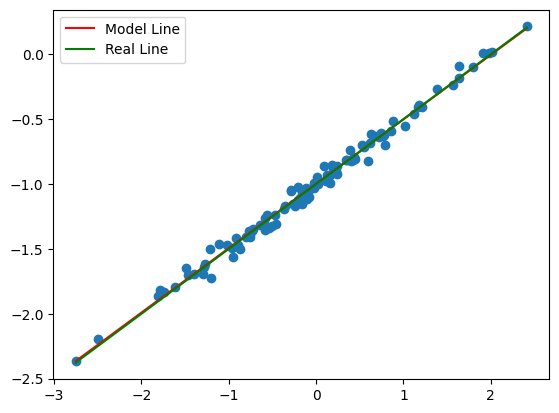

In [56]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

plt.subplots()
plt.scatter(df.x, df.y)

xfit = np.linspace(x.min(), x.max(), 100)
yfit = model.predict(xfit.reshape(-1, 1))
fit, = plt.plot(xfit, yfit, color='r')

xpop = np.linspace(x.min(), x.max(), 100)
ypop = -1 + 0.5*xpop
pop, = plt.plot(xpop, ypop, color='g')

plt.legend([fit, pop], ['Model Line', 'Real Line'])

In [57]:
reg = smf.ols('y ~ x', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.020e+04
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          7.10e-101
Time:                        06:13:10   Log-Likelihood:                 161.57
No. Observations:                 100   AIC:                            -319.1
Df Residuals:                      98   BIC:                            -313.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9978      0.005   -204.990      0.000      -1.007      -0.988
x              0.4965      0.005    100.998      0.000       0.487       0.506
==============================================================================
Omnibus:                        0.187   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.176
Skew:                          -0.095   Prob(JB):                        0.916
Kurtosis:                       2.919   Cond. No.                         1.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we reduce the noise, we could obtain a better fit, which can be inferred from narrowed confidence intervals, and a higher R-squared.

# **(i)**

In [58]:
x = np.random.normal(loc = 0, size = 100)
eps = np.random.normal(loc = 0, scale = 1, size = 100)
y = -1 + 0.5*x + eps
len(y)

100

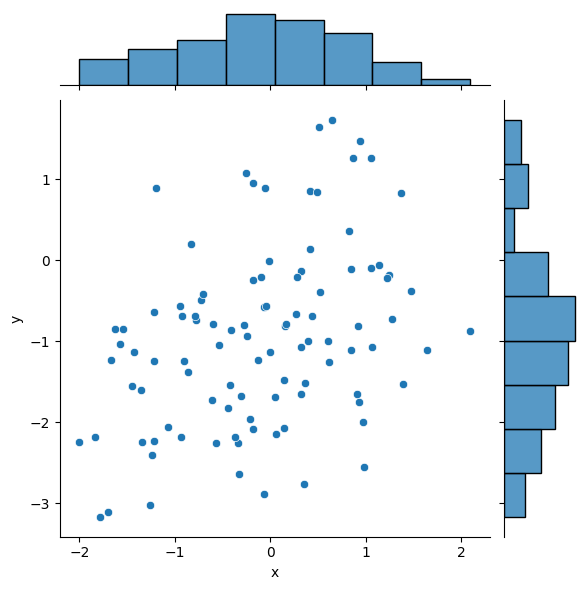

In [59]:
df = pd.DataFrame({'x': x, 'y': y})
sns.jointplot(x='x', y='y', data=df)

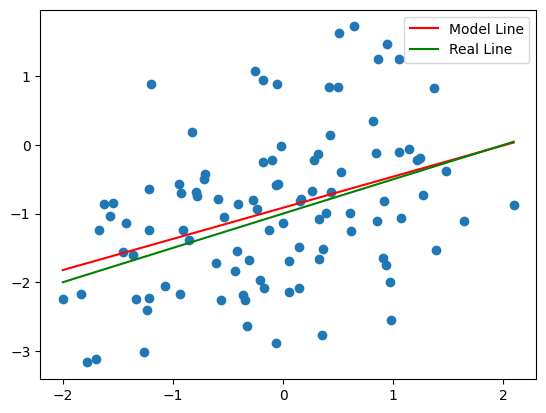

In [61]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

plt.subplots()
plt.scatter(df.x, df.y)

xfit = np.linspace(x.min(), x.max(), 100)
yfit = model.predict(xfit.reshape(-1, 1))
fit, = plt.plot(xfit, yfit, color='r')

xpop = np.linspace(x.min(), x.max(), 100)
ypop = -1 + 0.5*xpop
pop, = plt.plot(xpop, ypop, color='g')

plt.legend([fit, pop], ['Model Line', 'Real Line'])

In [60]:
reg = smf.ols('y ~ x', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     16.28
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           0.000108
Time:                        06:13:11   Log-Likelihood:                -144.21
No. Observations:                 100   AIC:                             292.4
Df Residuals:                      98   BIC:                             297.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9148      0.104     -8.798      0.000      -1.121      -0.708
x              0.4539      0.112      4.035      0.000       0.231       0.677
==============================================================================
Omnibus:                        2.107   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.349   Jarque-Bera (JB):                2.131
Skew:                           0.314   Prob(JB):                        0.345
Kurtosis:                       2.659   Cond. No.                         1.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On the contrary to the previous one, we obtained a worse fit. This is because the R-squared is 0.142 and the confidence intervals for the coefficients are much wider.

# **(j)**

Original Data Set $(Var(\epsilon)=0.25): [-1.070, -0.975], [0.483, 0.581]\\$
Nosier Data Set $(Var(\epsilon)=1): [-1.264, -0.87], [0.382, 0.802]\\$
Less Noisy Data Set $(Var(\epsilon)=0.05): [-1.016, -0.998], [0.491, 0.507]\\$

# **14.**

# **(a)**

In [62]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

$ Y=\beta_0 + \beta_1 X_1+ \beta_2 X_2 + \epsilon = 2 + 2X_1 + 0.3X_2 + \epsilon$

# **(b)**

In [63]:
np.corrcoef(x1, x2)

array([[1.       , 0.7723245],
       [0.7723245, 1.       ]])

Correlation Coefficient Between $X_1, X_2$ is 0.7723245

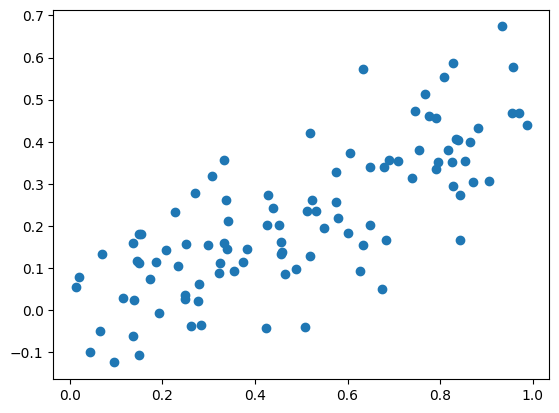

In [64]:
plt.scatter(x1, x2)

# **(c)**

In [65]:
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

reg = smf.ols('y ~ x1 + x2', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           5.76e-08
Time:                        06:13:12   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$
\hat{\beta_0} = 1.9579 \\
\hat{\beta_1} = 1.6154 \\
\hat{\beta_2} = 0.9428 \\
$
These values are estimators of the true coefficients, which have the following values:
$
\beta_0 = 2\\
\beta_1 = 2\\
\beta_2 = 0.3
$

$H_0: \beta_1=0:$ As $t$ statistics is high, so that corresponding $p$ value is low, we should reject the null hypothesis and accept the alternative hypothesis.
$\\$
$H_0: \beta_2=0:$ In this case the t-statistics is low and $p$ value is high. Therefore, the null hypothesis can't be rejected.


# **(d)**

In [66]:
reg = smf.ols('y ~ x1', data=df[['x1', 'y']]).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           1.37e-08
Time:                        06:13:12   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The null hypothesis can be rejected and the alternative hypothesis accepted because $p$ value is zero.

# **(e)**

In [67]:
reg = smf.ols('y ~ x2', data=df[['x2', 'y']]).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           7.43e-07
Time:                        06:13:12   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3239      0.154     15.124      0.000       2.019       2.629
x2             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The null hypothesis can be rejected and the alternative hypothesis accepted because $p$ value is 0.

# **(f)**

No, since $X_1$, and $X_2$ are highly correlated. Therefore, when two variables are both used in the prediction model, one of them is likely to lose its explainability because the other one can explain expected output enough. This can be clearly demonstrated by the fact that each variable has a clear linear relationship with $Y$, when used respectively.

# **(g)**

In [68]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

In [69]:
# model (c)

df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
reg = smf.ols('y ~ x1 + x2', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           4.60e-08
Time:                        06:13:12   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0618      0.192     10.720      0.000       1.680       2.443
x1             0.8575      0.466      1.838      0.069      -0.068       1.783
x2             2.2663      0.705      3.216      0.002       0.868       3.665
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.320
Skew:                           0.013   Prob(JB):                        0.852
Kurtosis:                       2.725   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# model (d)

reg = smf.ols('y ~ x1', data=df[['x1', 'y']]).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           9.23e-07
Time:                        06:13:12   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0739      0.201     10.310      0.000       1.675       2.473
x1             1.8760      0.358      5.236      0.000       1.165       2.587
==============================================================================
Omnibus:                        8.232   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.781
Skew:                           0.396   Prob(JB):                      0.00456
Kurtosis:                       4.391   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# model (e)

reg = smf.ols('y ~ x2', data=df[['x2', 'y']]).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           3.13e-08
Time:                        06:13:12   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2840      0.151     15.088      0.000       1.984       2.584
x2             3.1458      0.524      6.008      0.000       2.107       4.185
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.631
Skew:                          -0.041   Prob(JB):                        0.729
Kurtosis:                       2.621   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
np.corrcoef(x1, x2)

array([[1.        , 0.67891508],
       [0.67891508, 1.        ]])

From model using both variables, we can observe that the coefficient of $X_1$ decreased, and the one of $X_2$ increased. Also, now the null hypothesis is rejected in $X_2$ and accepted in $X_1$, which is opposite against the result in (c). This is because the newly added data improved the explainability of $X_2$ to predict $Y$ against $X_1$. However, according to the prediction using each variable, one can conclude that each variable still have relation with $Y$.